 # <span style='color:Darkgreen'> Machine Learning Models To Predict Average Customer Spend Segment</span>
 ##             <span style='color:Darkblue'>Created By:  Nnenna Ikeomumu on 08/04/2022  </span>

##### Knowing your customer value segment has the potential to increase business revenue and profit. AW has a vast amount of data, and machine learning techniques can be used to unlock valuable insights to support effective decision making, better customer engagement, reduce cost, and prioritise resources.

#### The approach uses machine learning techniques to classify customers as low, medium, or high spenders. 

##### The objective of this project is to deliver on the following : Develop data driven decision tool to predict customer average spend segment ,use the historical customer purchase to develope the average spend segement

#### Different machine learning classification algorithms was compared and the model with the best accuracy will be selected.


 # <span style='color:darkBlue'> 1) Data Preparation </span>


In [238]:
# Use the below Python libraries for the AW preparation and analysis 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from IPython.display import display, HTML

In [239]:
# Set working directory paths to get the file into Jupyter 

os.chdir('Path')
# set the path
path = 'Path'

# unzip the files
for file in os.listdir(path):
    if file.endswith('.zip'):
        zip_ref = zipfile.ZipFile(path + file, 'r')
        zip_ref.extractall(path)
        zip_ref.close()
for file in os.listdir(path):
            if file.endswith('.csv'):
                print(file)   # print the file in the folders

DimCustomer.csv
DimProduct.csv
DimProductSubcategory.csv
DimSalesReason.csv
DimSalesTerritory.csv
FactInternetSales.csv
FactInternetSalesReason.csv


In [240]:
# load all csv files 

DimCustomer= pd.read_csv('Path', dtype=str)
DimProduct= pd.read_csv('Path', dtype=str)
DimProductSubcategory= pd.read_csv('Path')
DimSalesReason= pd.read_csv('Path')
DimSalesTerritory= pd.read_csv('Path')
FactInternetSales= pd.read_csv('Path')
FactInternetSalesReason= pd.read_csv('Path')

In [241]:
# print the first five rows to gain an understanding of the data 
print(DimCustomer.head())
print(DimProduct.head())
print(DimProductSubcategory.head())
print(DimSalesReason.head())
print(DimSalesTerritory.head())
print(FactInternetSales.head())
print(FactInternetSalesReason.head())

  CustomerKey GeographyKey CustomerAlternateKey Title  FirstName MiddleName  \
0       11000           26           AW00011000   NaN        Jon          V   
1       11001           37           AW00011001   NaN     Eugene          L   
2       11002           31           AW00011002   NaN      Ruben        NaN   
3       11003           11           AW00011003   NaN    Christy        NaN   
4       11004           19           AW00011004   NaN  Elizabeth        NaN   

  LastName NameStyle   BirthDate MaritalStatus  ... EnglishOccupation  \
0     Yang         0  1971-10-06             M  ...      Professional   
1    Huang         0  1976-05-10             S  ...      Professional   
2   Torres         0  1971-02-09             M  ...      Professional   
3      Zhu         0  1973-08-14             S  ...      Professional   
4  Johnson         0  1979-08-05             S  ...      Professional   

  SpanishOccupation FrenchOccupation HouseOwnerFlag NumberCarsOwned  \
0       Profesi

In [242]:
#  check the dataframe information for nulls or missing values 

print(DimCustomer.info())
print(DimProduct.info())
print(DimProductSubcategory.info())
print(DimSalesReason.info())
print(DimSalesTerritory.info())
print(FactInternetSales.info())
print(FactInternetSalesReason.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerKey           18484 non-null  object
 1   GeographyKey          18484 non-null  object
 2   CustomerAlternateKey  18484 non-null  object
 3   Title                 101 non-null    object
 4   FirstName             18484 non-null  object
 5   MiddleName            10654 non-null  object
 6   LastName              18484 non-null  object
 7   NameStyle             18484 non-null  object
 8   BirthDate             18484 non-null  object
 9   MaritalStatus         18484 non-null  object
 10  Suffix                3 non-null      object
 11  Gender                18484 non-null  object
 12  EmailAddress          18484 non-null  object
 13  YearlyIncome          18484 non-null  object
 14  TotalChildren         18484 non-null  object
 15  NumberChildrenAtHome  18484 non-null

In [243]:
#  Initial clearning of the data. remove unwanted

DimCustomer=DimCustomer.loc[:, ~DimCustomer.columns.isin(['EmailAddress','Suffix','SpanishEducation ','FrenchEducation','SpanishOccupation', 'FrenchOccupation','AddressLine1', 'AddressLine2', 'Phone','Title','MiddleName','NameStyle'])] 
DimProduct=DimProduct[(DimProduct.ProductSubcategoryKey.astype(str).str.len()<=2)]  # filter for key only where lenght is less than or equal to lenght 2
DimProduct.dropna(subset=['DealerPrice'],inplace=True)  # remove missing value 
DimProduct.dropna(subset=['Class'],inplace=True) #remove missing value 
DimProduct.dropna(subset=['Size'],inplace=True)  #remove missing value 
DimProduct=DimProduct.iloc[:, list(range(23)) + [-12] + [-1]] #select the required columns.We would not need SpanishProductName,ChineseDescription etc.  
DimProduct=DimProduct.loc[:, ~DimProduct.columns.isin(['SpanishProductName', 'FrenchProductName'])] # drop both columns 
DimProductSubcategory = DimProductSubcategory.iloc[:, list(range(3)) + [-1]]
DimSalesTerritory=DimSalesTerritory.loc[(DimSalesTerritory['SalesTerritoryKey'].isin(['1','2','3','4','5','6','7','8','9','10','11'])),['SalesTerritoryKey','SalesTerritoryRegion','SalesTerritoryCountry','SalesTerritoryGroup']]
DimSalesTerritory=DimSalesTerritory.dropna()
FactInternetSales=FactInternetSales.iloc[:, list(range(21)) + [-3]+ [-2]+ [-1]] 

In [244]:
# Select only the columns of interest here, change the data type for some of the columns, and derive new columns
# The new columns will be an additional features we would use to build the ML/AL model.  


# select the columns of interest 
FactInternetSales = FactInternetSales[['CustomerKey','OrderQuantity','UnitPrice','PromotionKey'
                                       ,'SalesTerritoryKey','SalesAmount','OrderDate','SalesOrderNumber','SalesOrderNumber']]

# select the columns of interest 
DimCustomer = DimCustomer[['CustomerKey', 'BirthDate','MaritalStatus','Gender','YearlyIncome', 'TotalChildren'
                            ,'NumberChildrenAtHome','EnglishEducation','EnglishOccupation',"FirstName","LastName"
                            ,'NumberCarsOwned','CommuteDistance','DateFirstPurchase']]
#change the data type 
FactInternetSales['OrderQuantity'] = FactInternetSales['OrderQuantity'].astype(int)
FactInternetSales['UnitPrice'] = FactInternetSales['UnitPrice'].astype(float)
#change the data type 
FactInternetSales['OrderDate'] = FactInternetSales['OrderDate'].astype('datetime64[ns]')

# calculate total customer purchase 
FactInternetSales['total_customer_revenue'] = FactInternetSales['OrderQuantity'] * FactInternetSales['UnitPrice']
# change the data type 
FactInternetSales['total_customer_revenue'] = FactInternetSales['total_customer_revenue'].astype(float)
FactInternetSales['SalesAmount']=FactInternetSales['SalesAmount'].astype(float)

# calculate the number of days since customer last purchase, the total quantity ordered 
# and the total customer revenue per customers.  



FactInternetSales_group=FactInternetSales.groupby(['CustomerKey','SalesTerritoryKey']).agg({'OrderDate': lambda date: (date.max() - date.min()).days
                                            ,'OrderQuantity': lambda quant: quant.sum()   
                                            ,'total_customer_revenue': lambda amount: amount.sum()/amount.count()
                                            ,'SalesAmount': lambda sales: sales.sum()}).reset_index()
                                          

#rename the columns 
FactInternetSales_group.rename(columns={'OrderDate':'Customer_Recency','OrderQuantity':'Total_Order_Quantity','SalesAmount':'Total_Sales_Amount'
                                        ,'total_customer_revenue':'Average_Spend_Customer'},inplace=True)

# join FactInternetSales_group to Dimcustomer and DimSalesTerritory dataframe to build the ML datasets 

Data_ML=FactInternetSales_group.merge(DimCustomer, how='left', on=['CustomerKey','CustomerKey'])
Data_ML=Data_ML.merge(DimSalesTerritory, how='left', on=['SalesTerritoryKey','SalesTerritoryKey'])

# Derive a new coloumn on order quanity to flag if a customer order is greater than one. 

Data_ML['OrderQuantityflag']=np.where(Data_ML['Total_Order_Quantity']>1, 'Yes', 'No')

# change the data type for the following columns 
Data_ML['TotalChildren']=Data_ML['TotalChildren'].astype(int)
Data_ML['YearlyIncome']=Data_ML['YearlyIncome'].astype(float)
Data_ML['Customer_Recency']=Data_ML['Customer_Recency'].astype(int)
Data_ML['Customer_Recency']=Data_ML['Customer_Recency'].astype(int)

# Derive a new column for the customer Age using date of birth and date of customer first purchase
Data_ML['BirthDate'] = pd.to_datetime(Data_ML['BirthDate'])
Data_ML['DateFirstPurchase'] = pd.to_datetime(Data_ML['DateFirstPurchase'])
Data_ML['Age'] = Data_ML['BirthDate'] - Data_ML['DateFirstPurchase']
Data_ML['Age'] = Data_ML['Age'].dt.days/365
Data_ML['Age'] = Data_ML['Age'].astype(int)
Data_ML['Age'] = Data_ML['Age'].abs()
Data_ML['NumberChildrenAtHome'] = Data_ML['NumberChildrenAtHome'].astype(int)
Data_ML['NumberCarsOwned'] = Data_ML['NumberCarsOwned'].astype(int) 

#Derive the average class label which is the target class to build the mode 

Data_ML['Avg_Spend_Class'] = np.where(Data_ML['Average_Spend_Customer']<1500, 'Low_Spender', np.where(Data_ML['Average_Spend_Customer']<=3000, 'Medium_Spender', 'High_Spender'))
# View the ML datasets 
Data_ML.head(10)

,CustomerKey,SalesTerritoryKey,Customer_Recency,Total_Order_Quantity,Average_Spend_Customer,Total_Sales_Amount,BirthDate,MaritalStatus,Gender,YearlyIncome,...,LastName,NumberCarsOwned,CommuteDistance,DateFirstPurchase,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,OrderQuantityflag,Age,Avg_Spend_Class
0,11000,9,835,8,1031.123750,8248.99,1971-10-06,M,M,90000.0,...,Yang,0,1-2 Miles,2011-01-19,Australia,Australia,Pacific,Yes,39,Low_Spender
1,11001,9,1060,11,580.352727,6383.88,1976-05-10,S,M,60000.0,...,Huang,1,0-1 Miles,2011-01-15,Australia,Australia,Pacific,Yes,34,Low_Spender
2,11002,9,778,4,2028.510000,8114.04,1971-02-09,M,M,60000.0,...,Torres,1,2-5 Miles,2011-01-07,Australia,Australia,Pacific,Yes,39,Medium_Spender
3,11003,9,863,9,904.365556,8139.29,1973-08-14,S,F,70000.0,...,Zhu,1,5-10 Miles,2010-12-29,Australia,Australia,Pacific,Yes,37,Low_Spender
4,11004,9,829,6,1366.001667,8196.01,1979-08-05,S,F,80000.0,...,Johnson,4,1-2 Miles,2011-01-23,Australia,Australia,Pacific,Yes,31,Low_Spender
5,11005,9,854,6,1353.555000,8121.33,1976-08-01,S,M,70000.0,...,Ruiz,1,5-10 Miles,2010-12-30,Australia,Australia,Pacific,Yes,34,Low_Spender
6,11006,9,841,5,1623.806000,8119.03,1976-12-02,S,F,70000.0,...,Alvarez,1,5-10 Miles,2011-01-24,Australia,Australia,Pacific,Yes,34,Medium_Spender
7,11007,9,800,8,1026.375000,8211.00,1969-11-06,M,M,60000.0,...,Mehta,2,0-1 Miles,2011-01-09,Australia,Australia,Pacific,Yes,41,Low_Spender
8,11008,9,767,7,1158.044286,8106.31,1975-07-04,S,F,60000.0,...,Verhoff,3,10+ Miles,2011-01-25,Australia,Australia,Pacific,Yes,35,Low_Spender
9,11009,9,833,5,1618.266000,8091.33,1969-09-29,S,M,70000.0,...,Carlson,1,5-10 Miles,2011-01-27,Australia,Australia,Pacific,Yes,41,Medium_Spender


 # <span style='color:darkBlue'> 2) Exploratory Analysis </span>

In [259]:
Data_ML.describe()

,Customer_Recency,Total_Order_Quantity,Average_Spend_Customer,Total_Sales_Amount,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,Age
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,157.409922,3.267583,507.098420,1588.329216,57305.777970,1.844352,1.004058,1.502705,43.334343
std,259.120854,2.620927,707.596882,2124.231717,32285.841703,1.612408,1.522660,1.138394,11.610735
min,0.000000,1.000000,2.290000,2.290000,10000.000000,0.000000,0.000000,0.000000,24.000000
25%,0.000000,2.000000,19.990000,49.970000,30000.000000,0.000000,0.000000,1.000000,34.000000
50%,0.000000,3.000000,69.990000,270.265000,60000.000000,2.000000,0.000000,2.000000,41.000000
75%,271.000000,4.000000,829.320357,2511.275000,70000.000000,3.000000,2.000000,2.000000,51.000000
max,1089.000000,68.000000,3578.270000,13295.380000,170000.000000,5.000000,5.000000,4.000000,97.000000


In [246]:
# Function to display Total Sales Amoun by customer territory, education, occupation and their commute distance

def display_side_by_side(dfs:list, captions:list):
  
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0\xa0"
    display(HTML(output))
    
x1=Data_ML.groupby(["SalesTerritoryCountry"])["Total_Sales_Amount"].sum().to_frame().sort_values(by="Total_Sales_Amount", ascending=False)
x2=Data_ML.groupby(["EnglishEducation"])["Total_Sales_Amount"].sum().to_frame().sort_values(by="Total_Sales_Amount", ascending=False)
x3=Data_ML.groupby(["EnglishOccupation"])["Total_Sales_Amount"].sum().to_frame().sort_values(by="Total_Sales_Amount", ascending=False)
x4=Data_ML.groupby(["CommuteDistance"])["Total_Sales_Amount"].sum().to_frame().sort_values(by="Total_Sales_Amount", ascending=False)

display_side_by_side([x1,x2], ['Fig SalesTerritoryCountry', 'Fig EnglishEducation'])
display_side_by_side([x3,x4], ['Fig EnglishOccupation', 'Fig CommuteDistance'])

,Total_Sales_Amount
SalesTerritoryCountry,
United States,9389789.510800
Australia,9061000.584400
United Kingdom,3391712.210900
Germany,2894312.338200
France,2644017.714300
Canada,1977844.862100
,Total_Sales_Amount
EnglishEducation,
Bachelors,9900142.757100


,Total_Sales_Amount
EnglishOccupation,
Professional,9907977.281100
Skilled Manual,6440080.858900
Management,5467861.544500
Clerical,4684786.643000
Manual,2857970.893200
,Total_Sales_Amount
CommuteDistance,
0-1 Miles,11207592.224801
2-5 Miles,4965514.436200


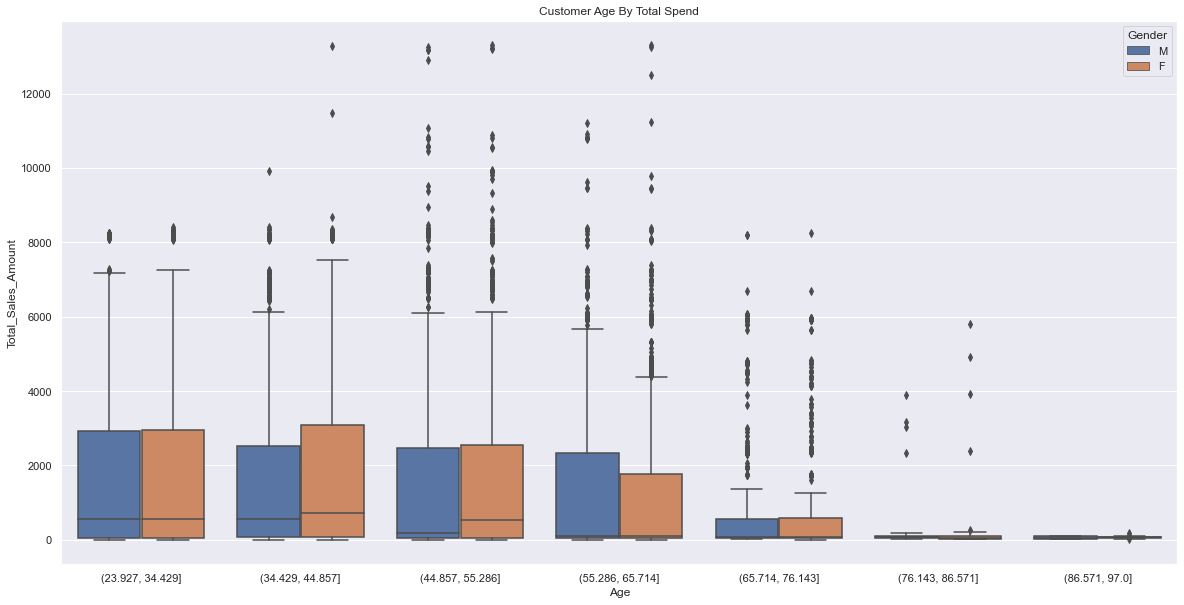

In [247]:
# Boxplot of customer total spend by their age 
age_seg = pd.cut(Data_ML['Age'], bins=7 )
sns.set(font_scale=1)
fig = plt.figure(figsize=(20,10))
sns.boxplot(age_seg, 'Total_Sales_Amount', data=Data_ML, hue = 'Gender')
plt.title('Customer Age By Total Spend')
plt.show()

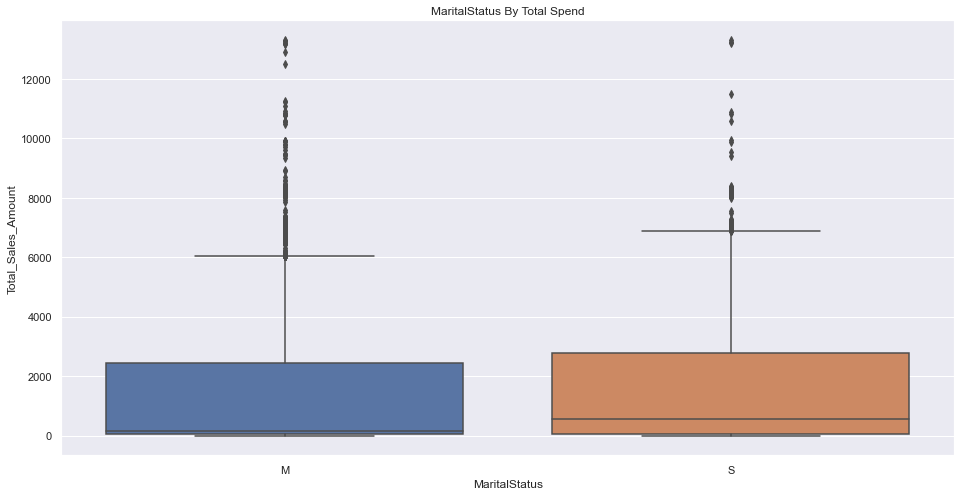

In [248]:
fig = plt.figure(figsize=(16,8))
sns.set(font_scale=1)
sns.boxplot('MaritalStatus', 'Total_Sales_Amount', data =Data_ML)
plt.title('MaritalStatus By Total Spend')
plt.show()

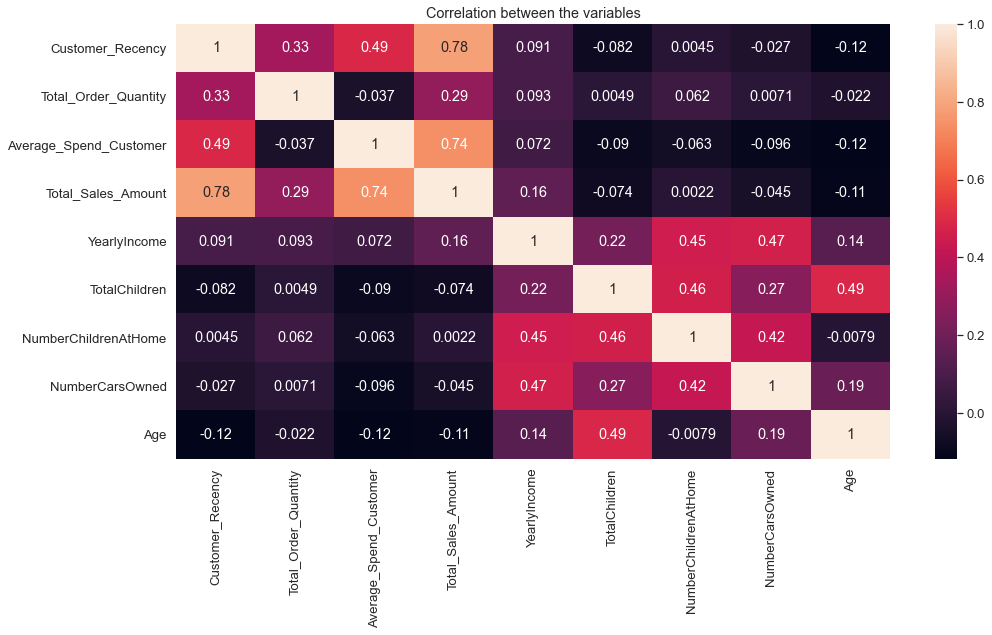

In [249]:
fig = plt.figure(figsize=(16,8))
sns.set(font_scale=1.2)
sns.heatmap(Data_ML.corr(),annot=True)
plt.title('Correlation between the variables')
plt.show()

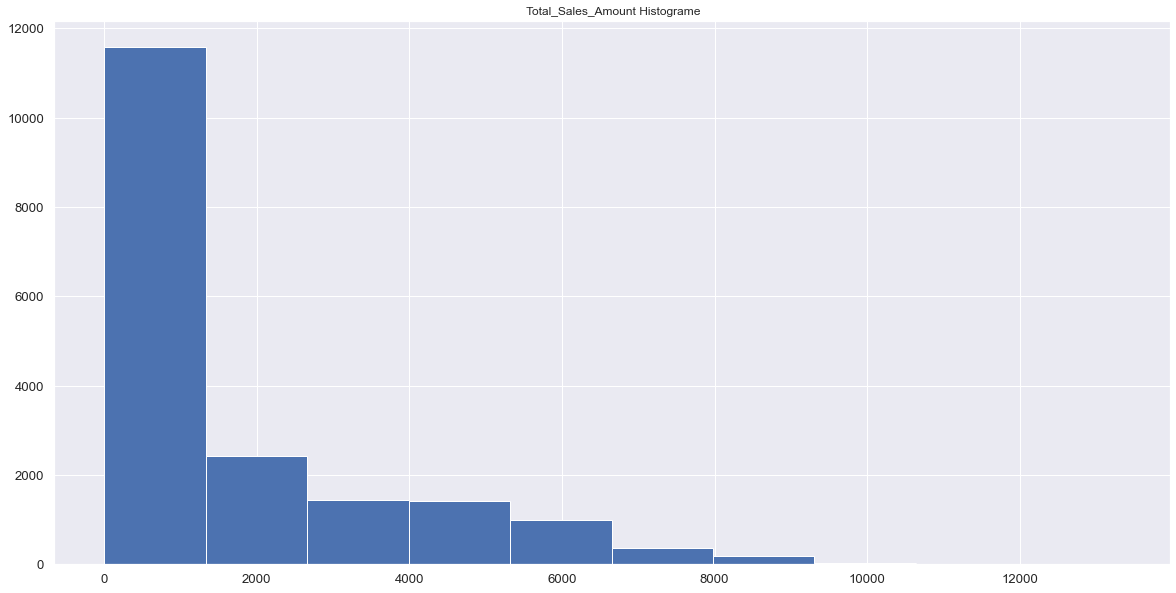

In [250]:
# View plot of Total customer Spend/ Sales Revenue  


fig = plt.figure(figsize=(20,10))
Data_ML['Total_Sales_Amount'].hist()
sns.set(font_scale=1)
plt.title(' Total_Sales_Amount Histograme')
plt.show()

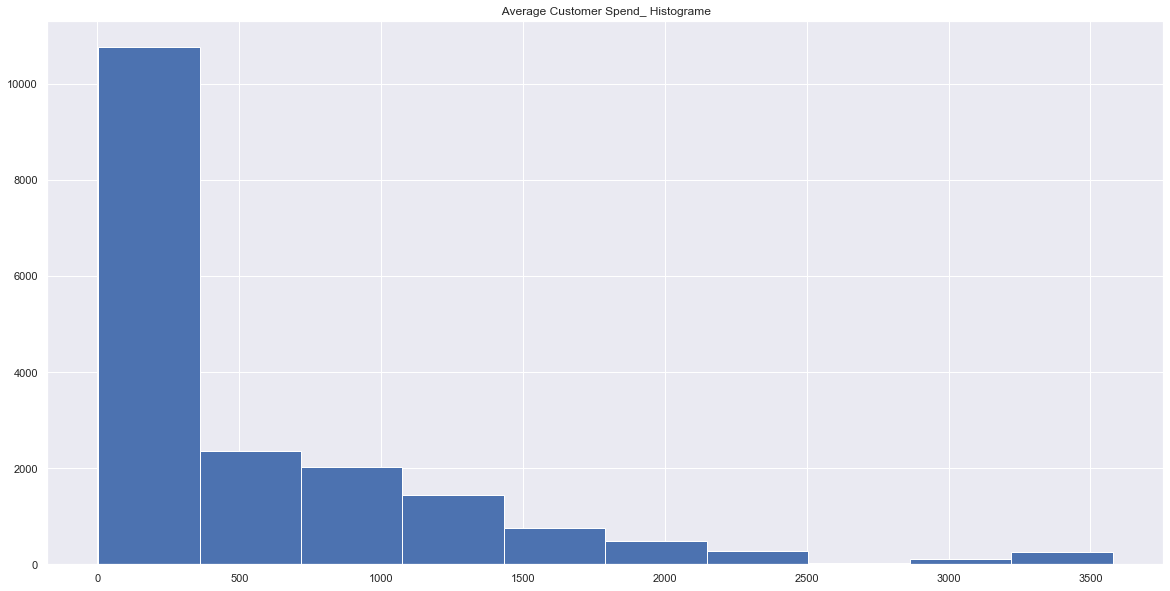

In [251]:
# View plot of Average customer Spend 

fig = plt.figure(figsize=(20,10))
Data_ML['Average_Spend_Customer'].hist()
sns.set(font_scale=1)
plt.title(' Average Customer Spend_ Histograme')
plt.show()

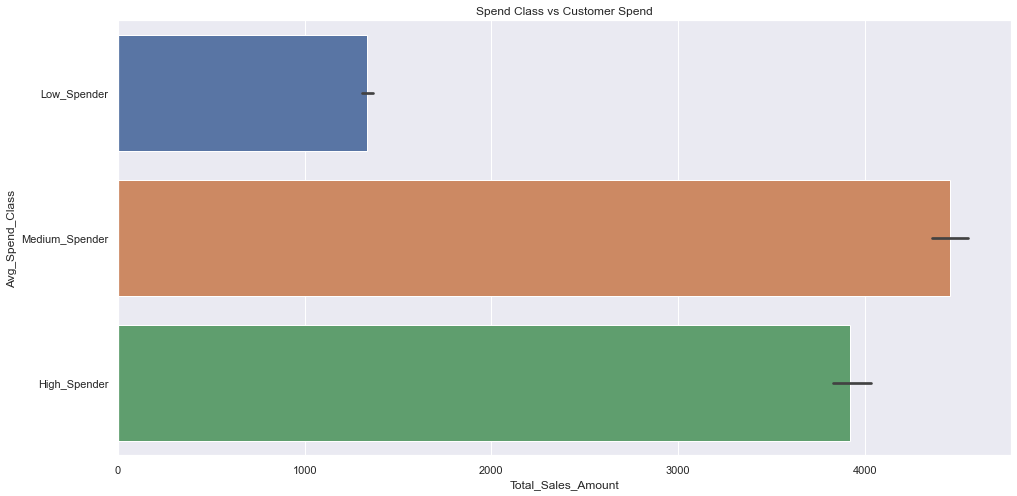

In [252]:
fig = plt.figure(figsize=(16,8))
sns.set(font_scale=1)
sns.barplot( 'Total_Sales_Amount','Avg_Spend_Class', data =Data_ML)
plt.title('Spend Class vs Customer Spend')
plt.show()

# <span style='color:darkBlue'> 3) Machine Learning Classification Model </span>
##  Section is to create four ML classifiers that can predict whether a customer is a low, medium, or a high spender. The target variable is the average customer spend derived from the total Customer Sales Amount/Revenue <span style='color:darkBlue'> </span>
### 1. Multiple Logistic Regression <span style='color:darkBlue'> </span>
### 2. Decision Tree  <span style='color:darkBlue'>   </span>
### 3. Neural Network  <span style='color:darkBlue'>   </span>
### 3. K-Nearest Neighbor  <span style='color:darkBlue'>   </span>

In [253]:
##Import the libraries

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

In [254]:
import warnings
warnings.filterwarnings('ignore')  

###  Multiple Logistic Classifier Model 

In [255]:
# seleact the model features and targets 

X = Data_ML[['Customer_Recency','Total_Order_Quantity','Gender'
          ,'MaritalStatus','YearlyIncome','TotalChildren'
         ,'EnglishEducation','EnglishOccupation','NumberCarsOwned'
         ,'CommuteDistance','SalesTerritoryRegion','OrderQuantityflag','Age']]

# Create the dummy variables
X = pd.get_dummies(X)

# CREATE THE TARGET VARIABLE 
Y= Data_ML['Avg_Spend_Class']


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
# Create the model
model = LogisticRegression()
# Fit the model
model.fit(X_train, y_train)
# Predict the test set
y_pred = model.predict(X_test)
# Evaluate the model

print('Classification report:', classification_report(y_test, y_pred))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))

Classification report:                 precision    recall  f1-score   support

  High_Spender       0.00      0.00      0.00       123
   Low_Spender       0.91      0.99      0.95      6730
Medium_Spender       0.47      0.06      0.11       541

      accuracy                           0.91      7394
     macro avg       0.46      0.35      0.35      7394
  weighted avg       0.87      0.91      0.87      7394

Accuracy of the model: 0.9096564782255883


##  Decision Tree Classifier Model

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                'min_samples_split': [2, 3, 4, 5],
                'min_samples_leaf': [1, 2, 3, 4, 5]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
estimator = grid.best_estimator_
y_pred = estimator.predict(X_test)
y_pred_new = grid.predict(X_test)
print('Classification report:', classification_report(y_test, y_pred))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))


Classification report:                 precision    recall  f1-score   support

  High_Spender       0.62      0.20      0.31       123
   Low_Spender       0.95      0.98      0.96      6730
Medium_Spender       0.64      0.50      0.56       541

      accuracy                           0.93      7394
     macro avg       0.74      0.56      0.61      7394
  weighted avg       0.92      0.93      0.92      7394

Accuracy of the model: 0.9300784419799838


## Neural Network Classifier Model


In [258]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'hidden_layer_sizes': [(100,), (50,), (25,), (10,)],
                'activation': ['identity', 'logistic', 'tanh', 'relu'],
                'solver': ['lbfgs', 'sgd', 'adam'],
                'alpha': [0.0001, 0.05]}
grid = GridSearchCV(MLPClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
estimator = grid.best_estimator_
y_pred = estimator.predict(X_test)
y_pred_new = grid.predict(X_test)


print('Classification report:', classification_report(y_test, y_pred))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))

Classification report:                 precision    recall  f1-score   support

  High_Spender       0.00      0.00      0.00       123
   Low_Spender       0.91      1.00      0.95      6730
Medium_Spender       0.00      0.00      0.00       541

      accuracy                           0.91      7394
     macro avg       0.30      0.33      0.32      7394
  weighted avg       0.83      0.91      0.87      7394

Accuracy of the model: 0.9101974573978902


##  K-Nearest Neighbor Classifier Model

In [257]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'weights': ['uniform', 'distance'], 
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
estimator = grid.best_estimator_
y_pred = estimator.predict(X_test)
y_pred_new = grid.predict(X_test)
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))


Accuracy of the model: 0.912767108466324
Classification report:                 precision    recall  f1-score   support

  High_Spender       0.59      0.20      0.29       123
   Low_Spender       0.92      0.99      0.96      6730
Medium_Spender       0.46      0.10      0.16       541

      accuracy                           0.91      7394
     macro avg       0.66      0.43      0.47      7394
  weighted avg       0.88      0.91      0.89      7394



# Add the prediction Result to the orginal dataset 

In [185]:
#add the prediction to the test set 
X_test_2=X_test
X_test_2['predicted_class'] = y_pred_new

In [195]:
# View result
X_test_2

,Customer_Recency,Total_Order_Quantity,YearlyIncome,TotalChildren,NumberCarsOwned,Age,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,...,SalesTerritoryRegion_France,SalesTerritoryRegion_Germany,SalesTerritoryRegion_Northeast,SalesTerritoryRegion_Northwest,SalesTerritoryRegion_Southeast,SalesTerritoryRegion_Southwest,SalesTerritoryRegion_United Kingdom,OrderQuantityflag_No,OrderQuantityflag_Yes,predicted_class
14566,883,4,20000.0,0,0,28,1,0,1,0,...,0,0,0,0,0,0,0,0,1,Low_Spender
1921,635,4,60000.0,3,0,40,0,1,0,1,...,0,0,0,0,0,1,0,0,1,Low_Spender
16480,0,4,70000.0,0,2,31,1,0,0,1,...,0,0,0,0,0,1,0,0,1,Low_Spender
775,609,4,50000.0,1,0,32,1,0,0,1,...,0,0,0,0,0,1,0,0,1,Low_Spender
10844,0,2,80000.0,4,1,53,0,1,1,0,...,0,1,0,0,0,0,0,0,1,Low_Spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,0,4,130000.0,5,4,60,1,0,1,0,...,0,0,0,0,0,0,1,0,1,Low_Spender
12164,540,4,60000.0,1,0,36,0,1,0,1,...,0,0,0,0,0,0,0,0,1,Low_Spender
8606,0,4,20000.0,3,2,75,0,1,0,1,...,0,0,0,0,0,0,0,0,1,Low_Spender
7247,100,3,70000.0,5,3,39,1,0,1,0,...,0,0,0,0,0,0,0,0,1,Low_Spender


In [235]:
# View for few columns
X_test_3=pd.concat([X_test_2, DimCustomer], axis=1)
X_test_3=pd.merge(X_test_2, DimCustomer, left_index=True, right_index=True)
X_test_3[["FirstName","Age","Gender","predicted_class"]]

,FirstName,Age,Gender,predicted_class
14566,Kristine,28,F,Low_Spender
1921,Wyatt,40,M,Low_Spender
16480,Chloe,31,F,Low_Spender
775,Sierra,32,F,Low_Spender
10844,James,53,M,Low_Spender
...,...,...,...,...
10870,Jenny,60,F,Low_Spender
12164,Kyle,36,M,Low_Spender
8606,Gabriel,75,M,Low_Spender
7247,Donna,39,F,Low_Spender


##  Model Selection and Recommendation 

#### Decision tree model gave the best accuracy of 0.93. One reason for the performance could be the ability of the algorithm to handle both continuous and categorical variables.

#### The business decision is to use the Decision Tree Classification technique to predict the customer's average spend segment.

#### The accuracy of the ML model could be improve by applying the below steps: 
###### - Solve class Imbalance
###### - Tuning
###### - Ensemble methods







# Thank You

Nnenna Ikeomumu